# Final Project - Training Data

This Notebook loads and displays some examples from the training dataset.

The training dataset contains a total of 6720 samples. All groups have been given the same training dataset and the final report will be graded based on the performance on this training data.

* You should expect the test dataset to have the same format as the training data: $90,000\times M$ numpy array, where $M$ is the number of test samples.
* This means that *any* pre-processing applied in the training data should also be applied in the test data.

In [1]:
from sklearn.model_selection import KFold, StratifiedKFold
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, Dropout
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import BatchNormalization
from numpy import mean
from numpy import std
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [2]:
# Loading Data
data_train = np.load('/home/jovermeyer/blue_eee4773/share/data_train.npy')
labels_train = np.load('/home/jovermeyer/blue_eee4773/jovermeyer/short-assignment-5-machine_learners/new_labels_train.npy')

print(data_train.shape, labels_train.shape)

(90000, 6720) (6720,)


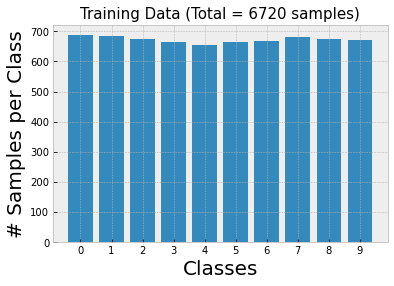

In [3]:
# Counting number samples per class
vals, counts = np.unique(labels_train, return_counts=True)

plt.bar(vals, counts)
plt.xticks(range(10),range(10))
plt.xlabel('Classes',size=20)
plt.ylabel('# Samples per Class', size=20)
plt.title('Training Data (Total = '+str(data_train.shape[1])+' samples)',size=15);

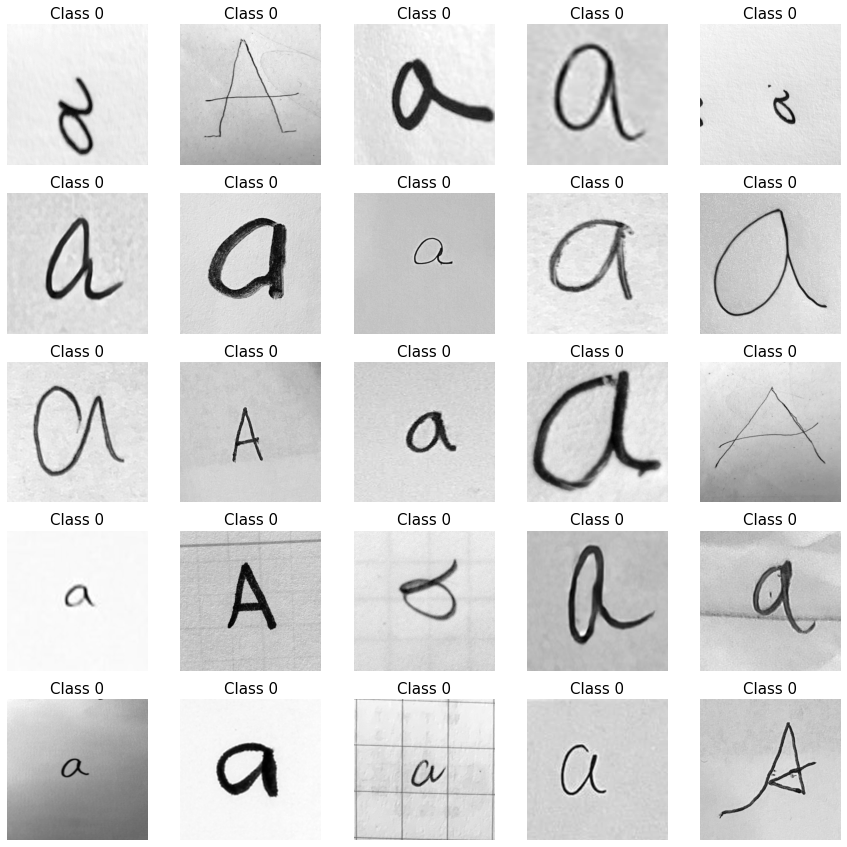

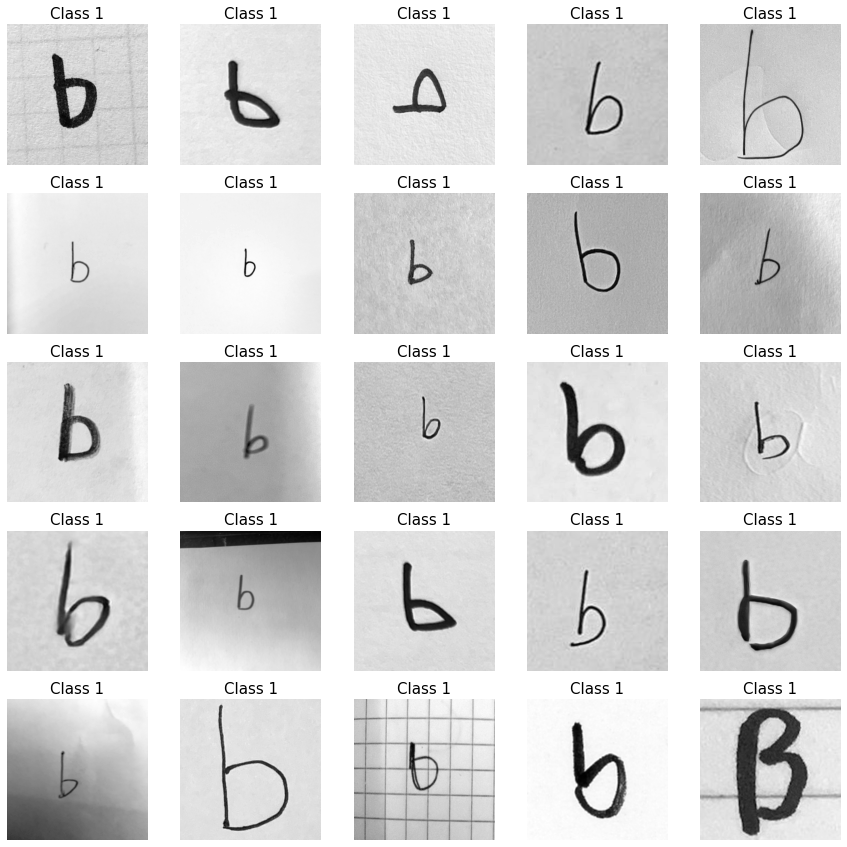

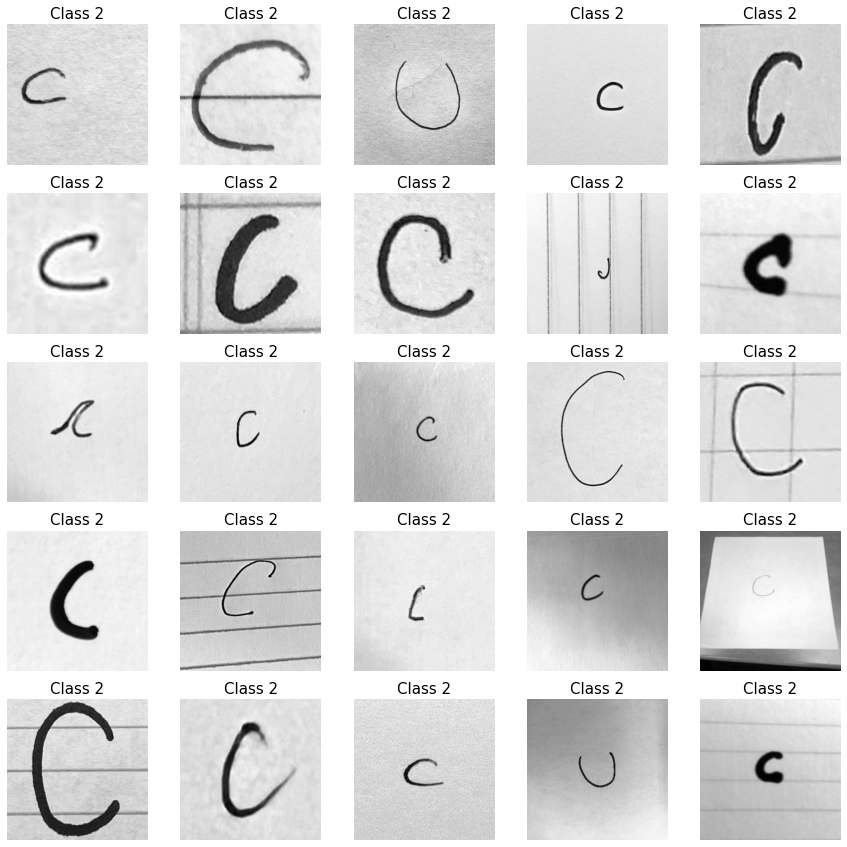

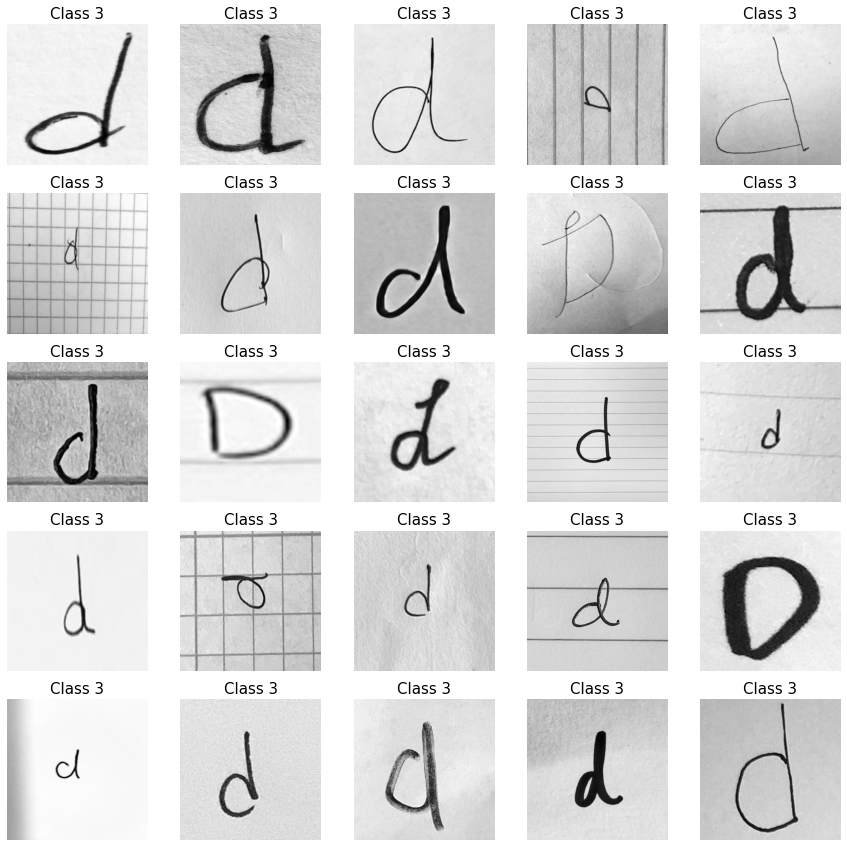

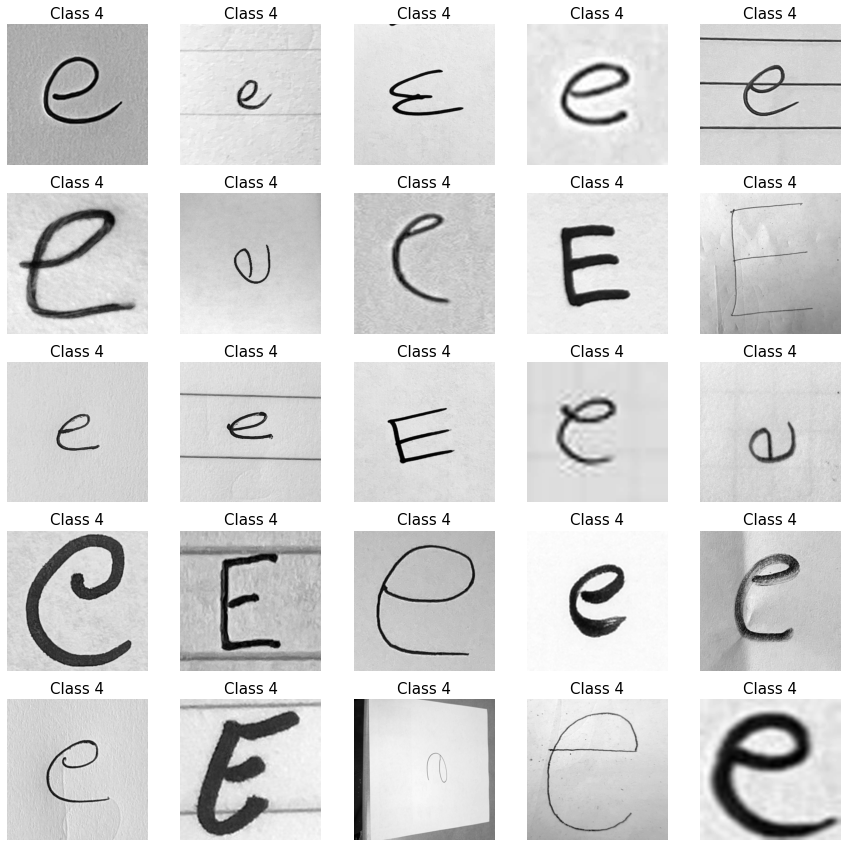

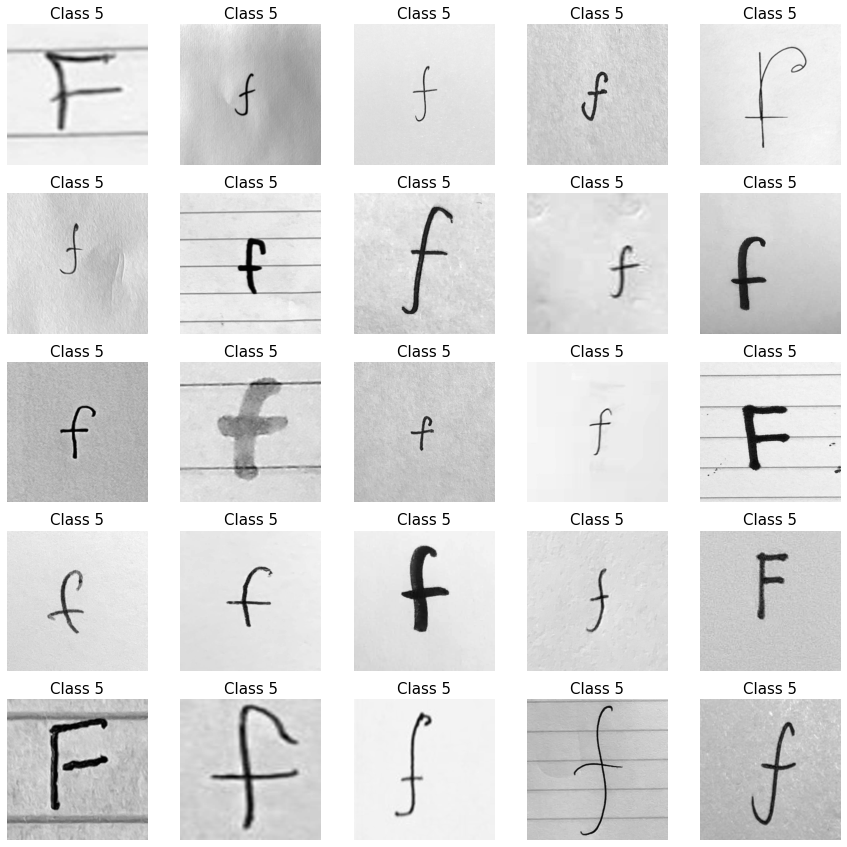

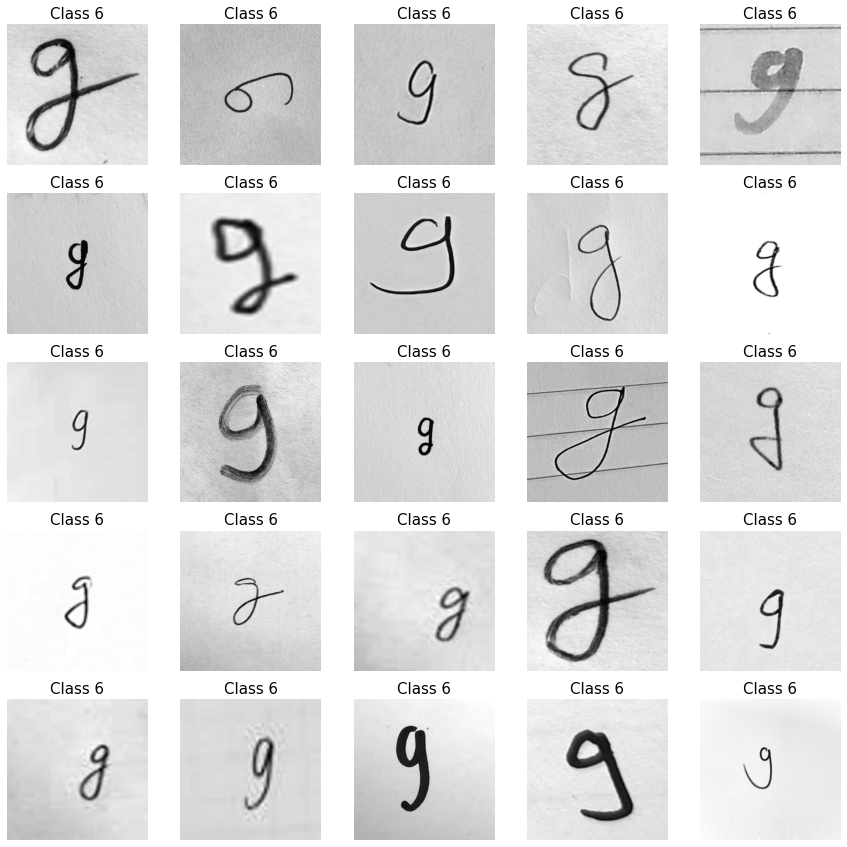

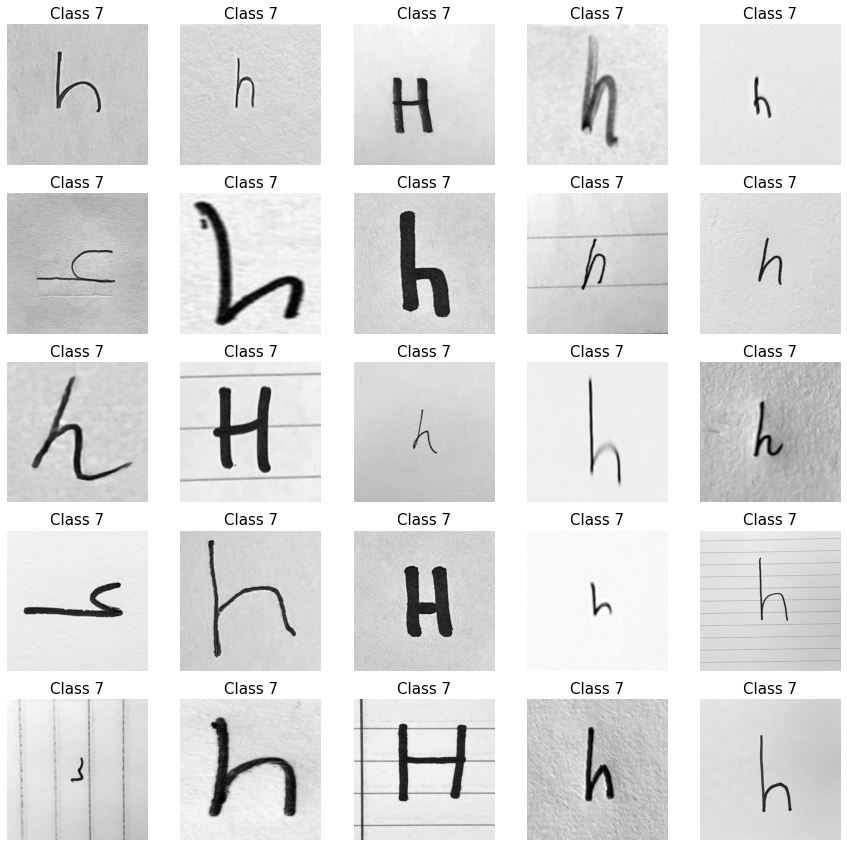

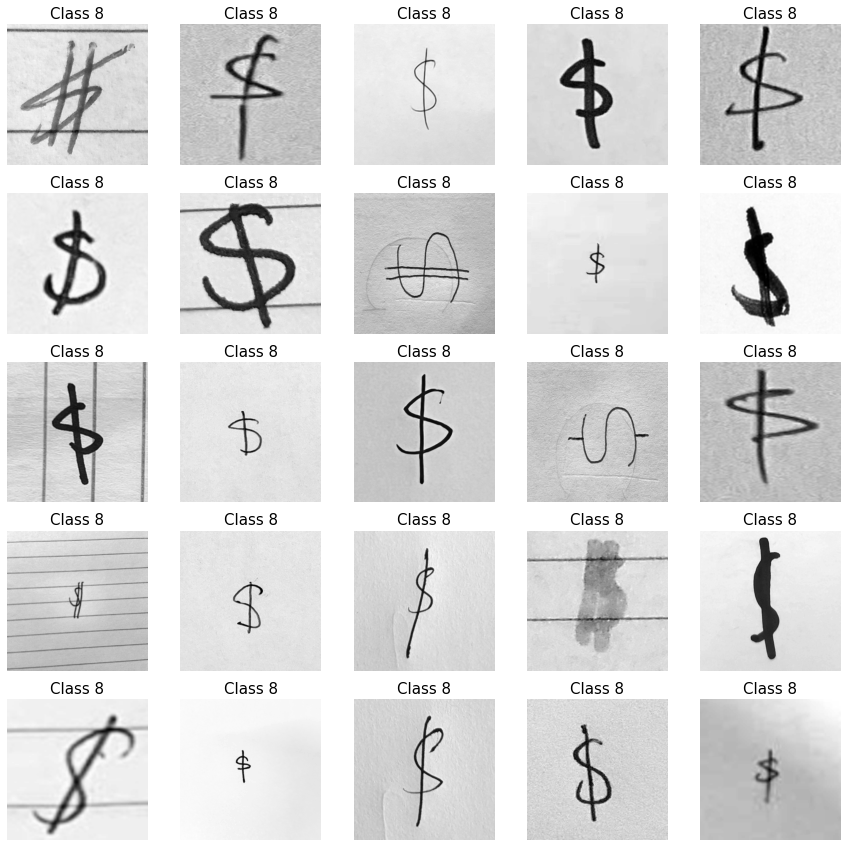

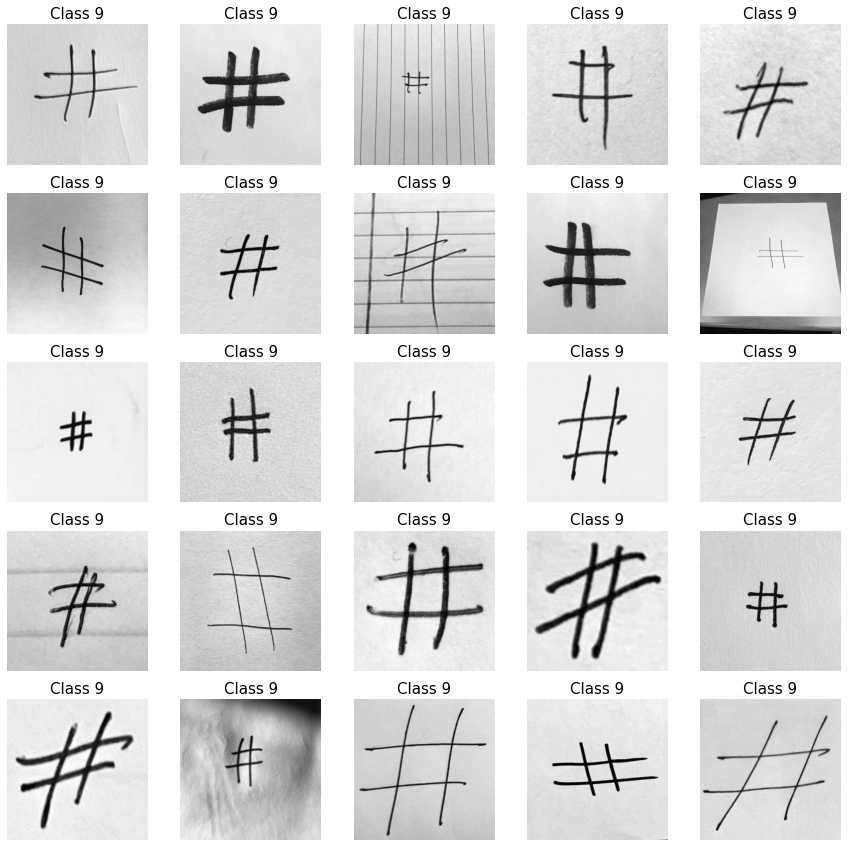

In [4]:
# Displaying some examples per class

for i in range(0,10):
    rnd_sample = npr.permutation(np.where(labels_train==i)[0])
    fig=plt.figure(figsize=(15,15))
    for j in range(25):
        fig.add_subplot(5,5,j+1)
        plt.imshow(data_train[:,rnd_sample[j]].reshape((300,300)),cmap='gray')
        plt.axis('off');plt.title('Class '+str(int(labels_train[rnd_sample[j]])),size=15)
    plt.show()
    print('\n\n')

(6720, 50, 50)
(6048, 50, 50, 1) (6048, 10) (672, 50, 50, 1) (672, 10)
Model Defined


2022-04-08 13:23:30.730439: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/jovermeyer/.local/lib/python3.8/site-packages/cv2/../../lib64:
2022-04-08 13:23:30.730469: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-08 13:23:30.730494: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c0711a-s30.ufhpc): /proc/driver/nvidia/version does not exist
2022-04-08 13:23:30.730741: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
180/180 [==============================] - 30s 164ms/step - loss: 3.4946 - accuracy: 0.1474 - val_loss: 2.6688 - val_accuracy: 0.1221
Epoch 2/100
180/180 [==============================] - 29s 163ms/step - loss: 2.4033 - accuracy: 0.2306 - val_loss: 2.1765 - val_accuracy: 0.2640
Epoch 3/100
180/180 [==============================] - 29s 163ms/step - loss: 2.1023 - accuracy: 0.2943 - val_loss: 2.0262 - val_accuracy: 0.3135
Epoch 4/100
180/180 [==============================] - 29s 163ms/step - loss: 1.8448 - accuracy: 0.3843 - val_loss: 1.5742 - val_accuracy: 0.4785
Epoch 5/100
180/180 [==============================] - 29s 162ms/step - loss: 1.6547 - accuracy: 0.4378 - val_loss: 1.4170 - val_accuracy: 0.5281
Epoch 6/100
180/180 [==============================] - 29s 163ms/step - loss: 1.4810 - accuracy: 0.4886 - val_loss: 1.2954 - val_accuracy: 0.5776
Epoch 7/100
180/180 [==============================] - 29s 162ms/step - loss: 1.3875 - accuracy: 0.5253 - val_loss: 1.2322 -

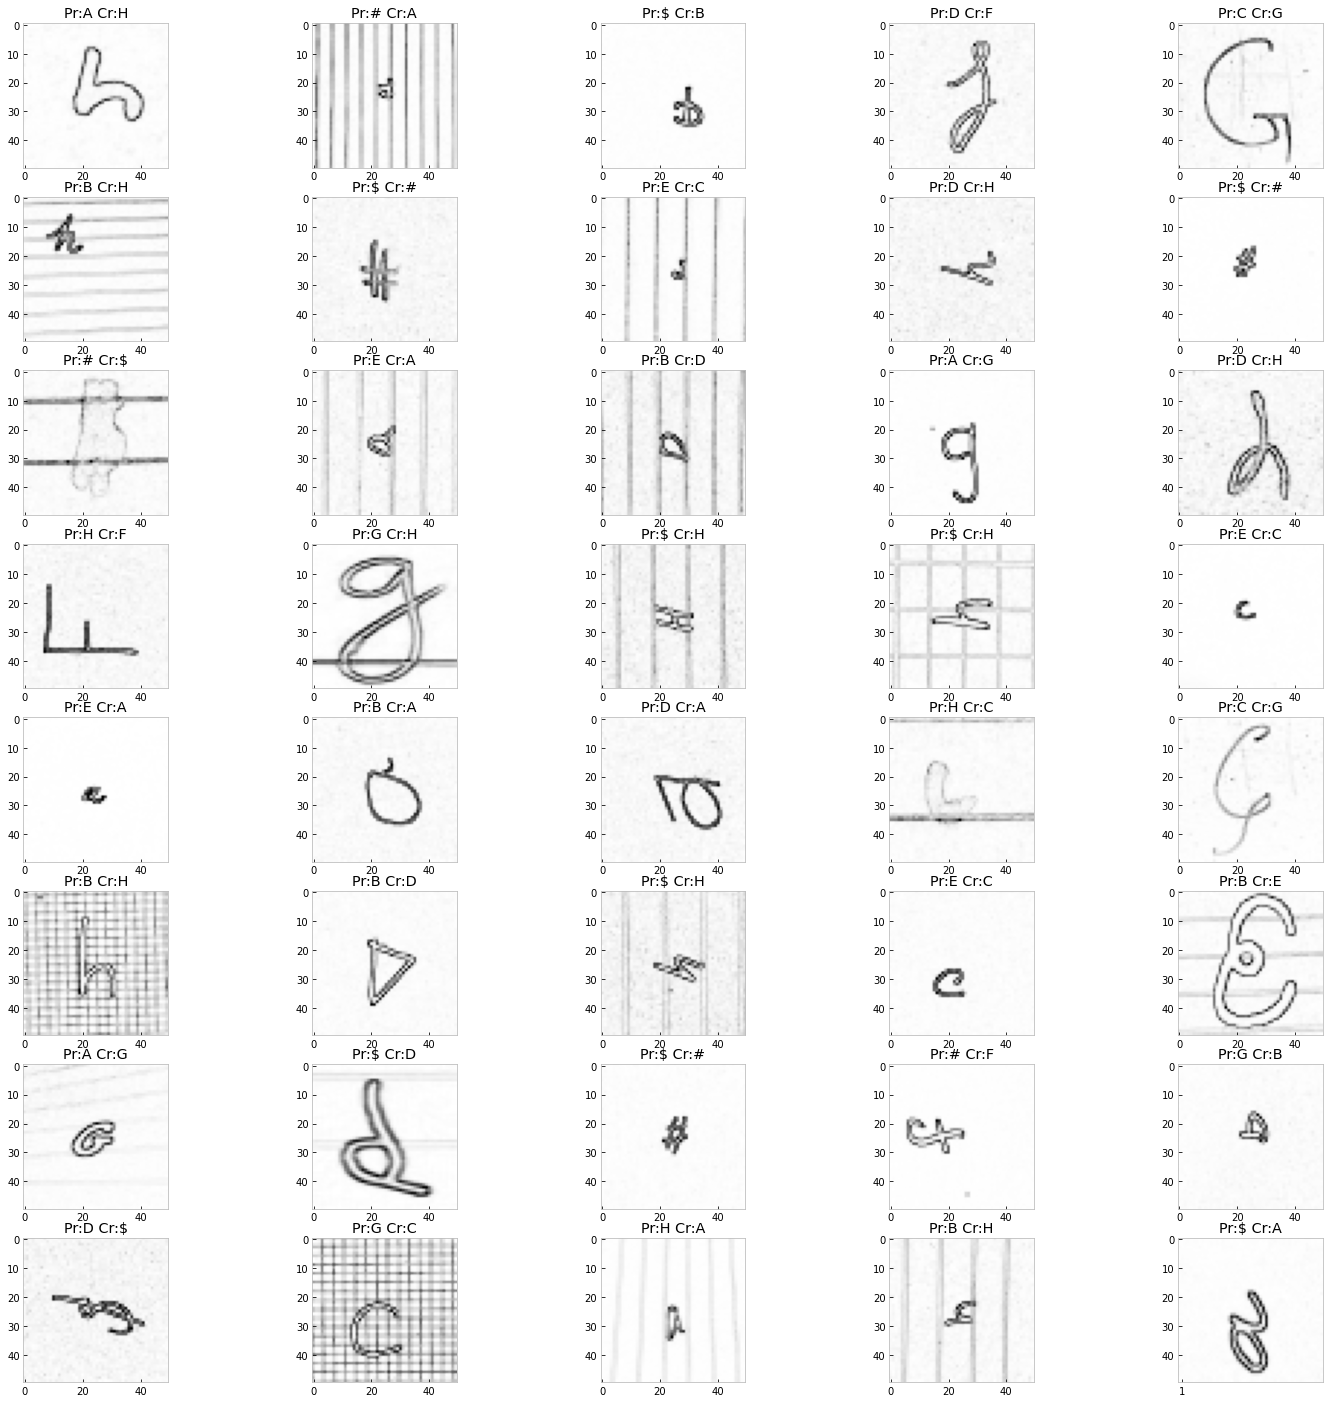

In [5]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'$',9:'#'}
import argparse
import skimage as sk
from skimage import transform
from skimage import util
import cv2
# load train and test dataset
def load_dataset():
    # load dataset
    data_rgb = []
    kernel = np.ones((3,3),np.uint8)
    for i in range(6720):
        data_rgb.append(data_train[:,i].reshape(300,300))
        data_rgb[i] = prep_pixels(data_rgb[i])
        data_rgb[i] = cv2.dilate(data_rgb[i],kernel,iterations = 1)
        data_rgb[i] = cv2.morphologyEx(data_rgb[i], cv2.MORPH_OPEN, kernel)
        data_rgb[i] = cv2.morphologyEx(data_rgb[i], cv2.MORPH_CLOSE, kernel)
        data_rgb[i] = cv2.morphologyEx(data_rgb[i], cv2.MORPH_GRADIENT, kernel)
        data_rgb[i] = cv2.resize(data_rgb[i], (50, 50), interpolation=cv2.INTER_AREA)
    data_rgb = np.array(data_rgb)
    print(data_rgb.shape)
    trainX, testX, trainY, testY = train_test_split(data_rgb, labels_train, test_size = 0.1, stratify=labels_train)
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 50, 50, 1))
    testX = testX.reshape((testX.shape[0], 50, 50, 1))
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    print(trainX.shape, trainY.shape, testX.shape, testY.shape)
    return trainX, trainY, testX, testY
 
# scale pixels
def prep_pixels(data):
	# convert from integers to floats
	data = data.astype('float32')
	# he_uniformize to range 0-1
	data = (255.0 - (data)) / 255.0
	# return he_uniformized images
	return data
 
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(50, 50, 1)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    model.add(Conv2D(32, (3,3),activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(64, (3,3),activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.4))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = Adam(learning_rate=0.0005 , epsilon=1e-7)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model
 
# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, tes_X, tes_y,n_folds=20):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = StratifiedKFold(n_folds, shuffle=False)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX,dataY.argmax(1)):
        # define model
        model = define_model()
        print("Model Defined")
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs = 100, batch_size=32, validation_data=(testX, testY), verbose=1)
        print("Model Fitted")
        # evaluate model
        _, acc = model.evaluate(tes_X, tes_y, verbose=1)
        print('> %.3f' % (acc * 100.0))
        # stores scores
        scores.append(acc)
        histories.append(history)
        pred = model.predict(tes_X)
        wr = []
        index = []
        te = []
        te = np.array(tes_y)
        print(te.shape)
        for b in range(672):
            wr.append(np.argmax(pred[b]))
            if wr[b] != np.argmax(te[b]):
                index.append(b)
        wr= np.array(wr)
        index = np.array(index)
        print(index, index.shape)
        fig, axes = plt.subplots((len(index)//7)+1,5, figsize=(25,25))
        axes = axes.flatten()
        h = 0
        for i,ax in enumerate(axes):
            if h == len(index):
                break
            img = np.reshape(tes_X[index[h]], (50,50))
            ax.imshow(img, cmap="Greys")
            pred = word_dict[wr[index[h]]]
            h = h + 1
            ax.set_title("Pr:"+pred+" Cr:"+ word_dict[np.argmax(te[index[h-1]])])
            ax.grid()
        break
    return scores, histories, model
 
# plot diagnostic learning curves
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        plt.subplot(2, 1, 1)
        plt.title('Cross Entropy Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        plt.subplot(2, 1, 2)
        plt.title('Classification Accuracy')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    plt.show()
# summarize model performance
def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    plt.boxplot(scores)
plt.show()
 
# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    
    # evaluate model
    scores, histories, model = evaluate_model(trainX, trainY, testX, testY)
    # learning curves
#     summarize_diagnostics(histories)
    # summarize estimated performance
    summarize_performance(scores)
    return model
# entry point, run the test harness
model = run_test_harness()